In [ ]:
import os, sys, glob
import numpy as np
"""
import matplotlib.pyplot as plt
import pandas as pd
"""
from obspy.core import read, Stream
"""
LIBpath = os.path.join( os.getenv('HOME'),'src','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
from metrics import process_trace
from libMVO import fix_trace_id, inventory_fix_id_mvo, load_mvo_inventory
import random
"""
from obspy.signal.cross_correlation import correlate, xcorr_max

def fix_sample_rate(st, Fs=75.0):
    for tr in st:
        tr.stats.sampling_rate = Fs

SEISAN_DATA = os.path.join( os.getenv('HOME'),'DATA','MVO') # e.g. /home/user/seismo
SEISAN_DB = 'MVOE_'
SEISAN_CONT_DB = 'DSNC_'

# Testing rbuffer joints to check sampling rate

In [ ]:
import matplotlib.pyplot as plt

def examine_rbuffer_joints(st1, st2):
    max_overlap = int((75.19-75.0)*20*60)
    plt.figure(figsize=(12,12))
    N = len(st1)
    for i,tr1 in enumerate(st1):
        for tr2 in st2:
            if tr1.id == tr2.id:
                print(tr1)
                print(tr2)
                print(tr1.data[-10:])
                print(tr2.data[0:10])
                y1 = tr1.data[-max_overlap:]
                y2 = tr2.data[0:max_overlap]
                x = range(len(y1)+len(y2))
                plt.subplot(N, 1, i+1)
                plt.plot(x[0:len(y1)], y1, 'blue')
                plt.plot(x[len(y1):], y2, 'red')
                plt.ylabel(tr1.id)

## 1. April 2001 (After the Earthworm system in mid-March 2001)

### irregular rbuffer times still, and sampling rate 75.2 sps
end time off here by over 3 seconds, suggesting wrong sample rate
the sequences still join, of course

.MBRY.J.SBZ | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:01.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBZ | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:01.994382Z | 75.2 Hz, 90000 samples
[4942 4507 4247 4264 4526 5012 5791 6712 7466 7850]
[7831 7374 6648 5919 5288 4820 4527 4555 4848 5136]
.MBRY.J.SBN | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:01.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBN | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:01.994382Z | 75.2 Hz, 90000 samples
[21788 21949 22821 24182 25380 25966 25977 26086 26864 27873]
[28339 28463 28778 28934 28346 27086 25620 24156 22619 21165]
.MBRY.J.SBE | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:01.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBE | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:01.994382Z | 75.2 Hz, 90000 samples
[ 526 1203 1536 1637 1668 1870 2134 2253 2180 1873]
[ 1488  1221  1169  1336  1363   995   435  -205 -1054 -1874]
.MBSS.J.S Z | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:01.994382Z | 75

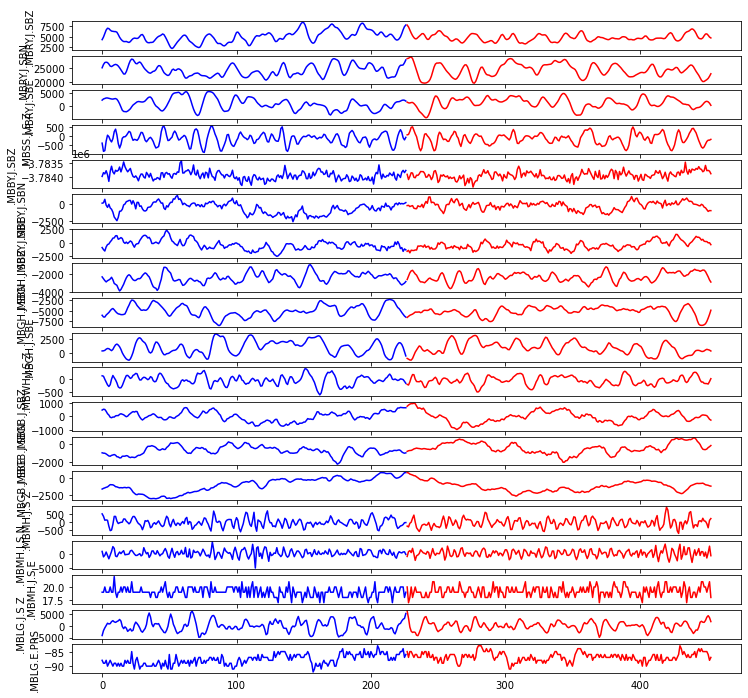

In [86]:
contWAV1 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2001/04/2001-04-30-1908-05S.MVO___019')
contWAV2 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2001/04/2001-04-30-1928-05S.MVO___019')
cont_st1 = read(contWAV1)
cont_st2 = read(contWAV2)
examine_rbuffer_joints(cont_st1, cont_st2)


### fix the sampling rate
this gives better end time

.MBRY.J.SBZ | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:05.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBZ | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:05.026667Z | 75.0 Hz, 90000 samples
[4942 4507 4247 4264 4526 5012 5791 6712 7466 7850]
[7831 7374 6648 5919 5288 4820 4527 4555 4848 5136]
.MBRY.J.SBN | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:05.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBN | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:05.026667Z | 75.0 Hz, 90000 samples
[21788 21949 22821 24182 25380 25966 25977 26086 26864 27873]
[28339 28463 28778 28934 28346 27086 25620 24156 22619 21165]
.MBRY.J.SBE | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:05.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBE | 2001-04-30T19:28:05.040000Z - 2001-04-30T19:48:05.026667Z | 75.0 Hz, 90000 samples
[ 526 1203 1536 1637 1668 1870 2134 2253 2180 1873]
[ 1488  1221  1169  1336  1363   995   435  -205 -1054 -1874]
.MBSS.J.S Z | 2001-04-30T19:08:05.040000Z - 2001-04-30T19:28:05.026667Z | 75

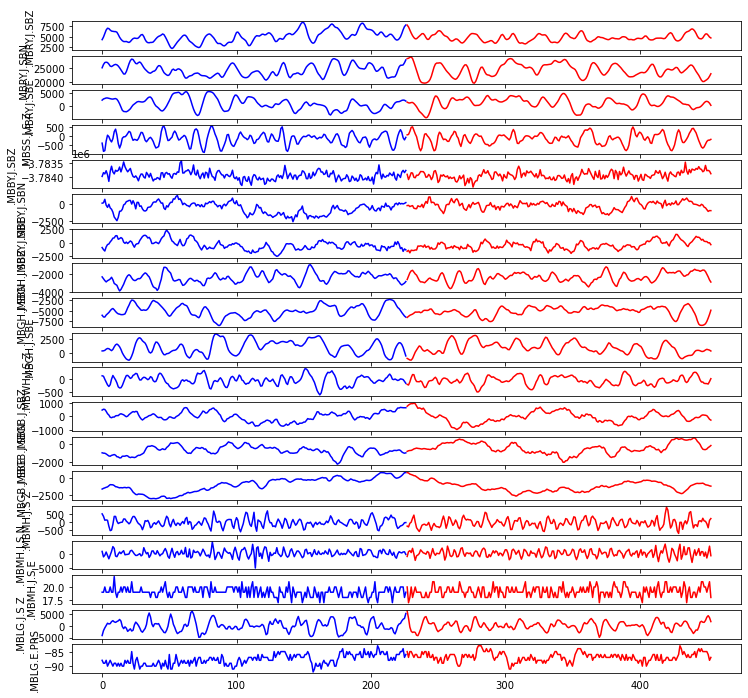

In [88]:
Fs=75.0
fix_sample_rate(cont_st1, Fs=Fs)
fix_sample_rate(cont_st2, Fs=Fs)
examine_rbuffer_joints(cont_st1, cont_st2)

## 2. April 2002

### regular rbuffer times and correct sampling rate
end time is good here

.MBWH.Z.SH | 2002-04-30T22:00:00.000000Z - 2002-04-30T22:19:59.986667Z | 75.0 Hz, 90000 samples
.MBWH.Z.SH | 2002-04-30T22:20:00.000000Z - 2002-04-30T22:39:59.986667Z | 75.0 Hz, 90000 samples
[ 56   9 -39 -54 -27  11  77 124 119  75]
[ 36   5 -32 -26   4  10  -5   3  23   3]
.MBSS.Z.SH | 2002-04-30T22:00:00.000000Z - 2002-04-30T22:19:59.986667Z | 75.0 Hz, 90000 samples
.MBSS.Z.SH | 2002-04-30T22:20:00.000000Z - 2002-04-30T22:39:59.986667Z | 75.0 Hz, 90000 samples
[ 222  129   29   73  153  230  290  221   31 -137]
[-168 -129  -90  -67  -81 -117 -155 -139  -53   73]
.MBRY.Z.BH | 2002-04-30T22:00:00.000000Z - 2002-04-30T22:19:59.986667Z | 75.0 Hz, 90000 samples
.MBRY.Z.BH | 2002-04-30T22:20:00.000000Z - 2002-04-30T22:39:59.986667Z | 75.0 Hz, 90000 samples
[ 537  569  287  -90 -286 -110  293  700  980  838]
[ 337 -154 -472 -429 -168   12  146  235  185   79]
.MBRY.N.BH | 2002-04-30T22:00:00.000000Z - 2002-04-30T22:19:59.986667Z | 75.0 Hz, 90000 samples
.MBRY.N.BH | 2002-04-30T22:20:00.000

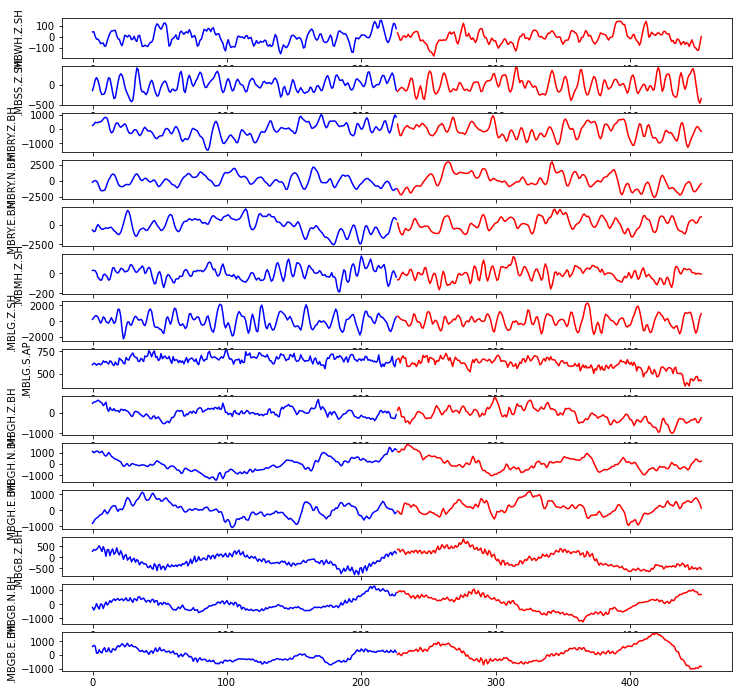

In [91]:
contWAV1 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2002/04/2002-04-30-2200-00S.MVO___014')
contWAV2 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2002/04/2002-04-30-2220-00S.MVO___014')
cont_st1 = read(contWAV1)
cont_st2 = read(contWAV2)
examine_rbuffer_joints(cont_st1, cont_st2)

## 3. April 2000 - The VME/Seislog system

### sampling rate and end time wrong again

.MBRY.J.SBZ | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:46.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBZ | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:46.994382Z | 75.2 Hz, 90000 samples
[4304 4540 4606 4533 4486 4496 4410 4306 4366 4516]
[4510 4394 4482 4767 5025 5192 5278 5230 5028 4728]
.MBRY.J.SBN | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:46.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBN | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:46.994382Z | 75.2 Hz, 90000 samples
[4159 4070 4135 4186 4140 4007 4043 4401 4884 5417]
[5915 6030 5687 5272 5138 5267 5475 5652 5838 5959]
.MBRY.J.SBE | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:46.994382Z | 75.2 Hz, 90000 samples
.MBRY.J.SBE | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:46.994382Z | 75.2 Hz, 90000 samples
[2483 2231 2186 2089 2095 2390 2810 3086 3291 3497]
[3554 3518 3293 2649 1803 1307 1370 1744 2178 2530]
.MBSS.J.S Z | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:46.994382Z | 75.2 Hz, 90000 samples
.MBSS.J.S

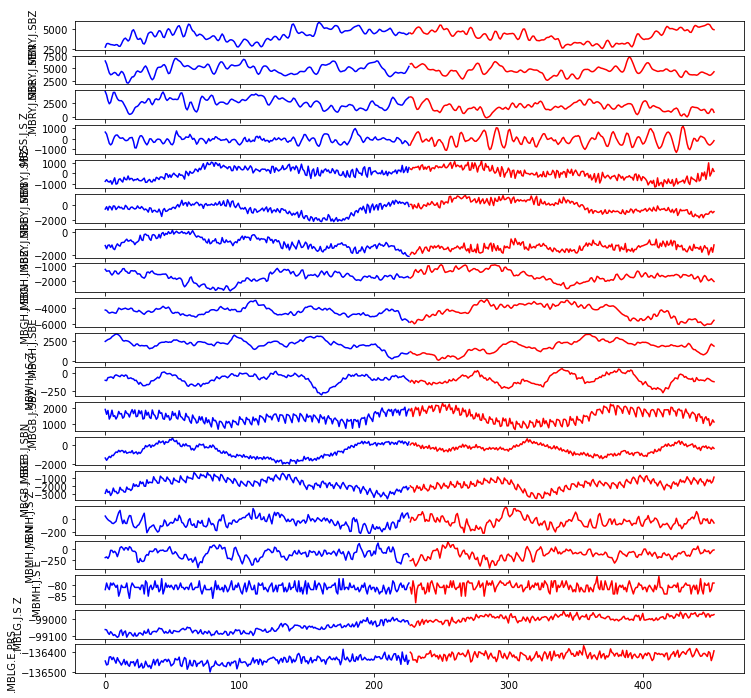

In [93]:
contWAV1 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/04/2000-04-30-1916-50S.MVO___019')
contWAV2 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/04/2000-04-30-1936-50S.MVO___019')
cont_st1 = read(contWAV1)
cont_st2 = read(contWAV2)
examine_rbuffer_joints(cont_st1, cont_st2)

### setting Fs=75.0 fixes everything again

.MBRY.J.SBZ | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:50.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBZ | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:50.026667Z | 75.0 Hz, 90000 samples
[4304 4540 4606 4533 4486 4496 4410 4306 4366 4516]
[4510 4394 4482 4767 5025 5192 5278 5230 5028 4728]
.MBRY.J.SBN | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:50.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBN | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:50.026667Z | 75.0 Hz, 90000 samples
[4159 4070 4135 4186 4140 4007 4043 4401 4884 5417]
[5915 6030 5687 5272 5138 5267 5475 5652 5838 5959]
.MBRY.J.SBE | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:50.026667Z | 75.0 Hz, 90000 samples
.MBRY.J.SBE | 2000-04-30T19:36:50.040000Z - 2000-04-30T19:56:50.026667Z | 75.0 Hz, 90000 samples
[2483 2231 2186 2089 2095 2390 2810 3086 3291 3497]
[3554 3518 3293 2649 1803 1307 1370 1744 2178 2530]
.MBSS.J.S Z | 2000-04-30T19:16:50.040000Z - 2000-04-30T19:36:50.026667Z | 75.0 Hz, 90000 samples
.MBSS.J.S

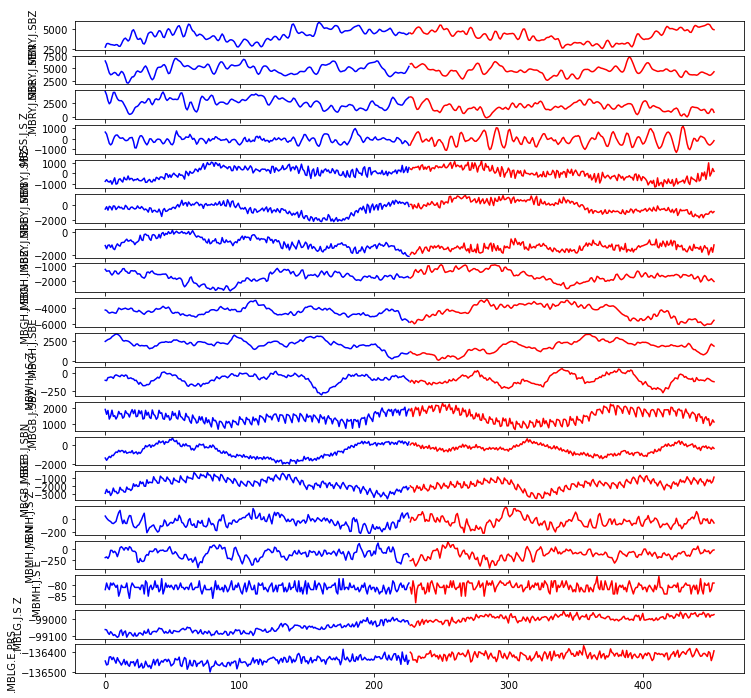

In [94]:
Fs=75.0
fix_sample_rate(cont_st1, Fs=Fs)
fix_sample_rate(cont_st2, Fs=Fs)
examine_rbuffer_joints(cont_st1, cont_st2)

## 4. April 1997 - the first network

### some odd jumps in the bottom channels, and 3-s gap again

.MBGA.J.SBZ | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBZ | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
[4029 3940 4071 4112 4385 4387 3844 4010 4434 4260]
[4581 4335 4178 3997 3891 3990 4045 3959 3844 3877]
.MBGA.J.SBN | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBN | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
[338 340 279 572 390 140 237 -55 -22 -17]
[ 937  987 1211 1564 1909 2195 2268 2025 1575 1281]
.MBGA.J.SBE | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBE | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
[3386 3549 3761 3569 3731 4180 3786 3661 3566 3175]
[4515 4483 4348 4066 3859 3784 3697 3515 3457 3559]
.MBLG.J.S Z | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:40.994382Z | 75.2 Hz, 90000 samples
.MBLG.J.S Z | 1997-

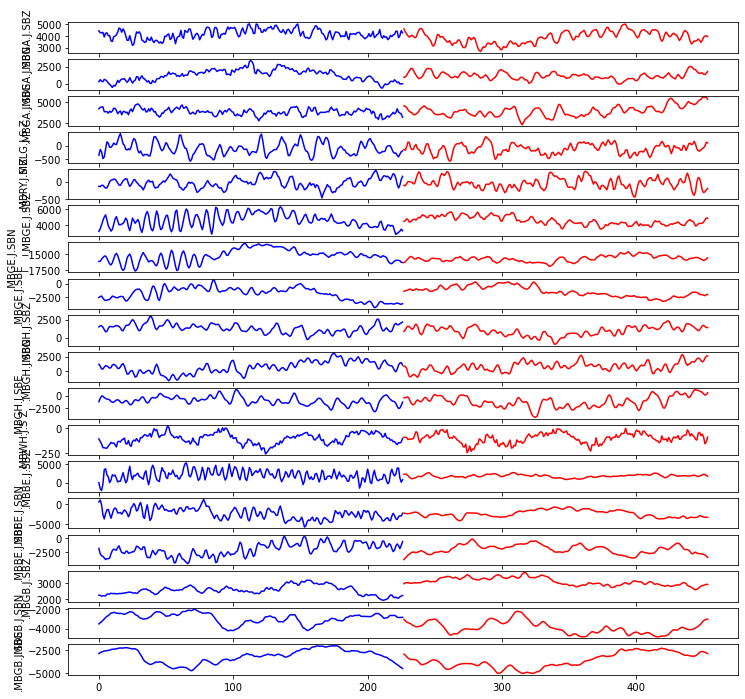

In [96]:
contWAV1 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1997/04/1997-04-30-2010-44S.MVO___018')
contWAV2 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1997/04/1997-04-30-2010-44S.MVO___018')
cont_st1 = read(contWAV1)
cont_st2 = read(contWAV2)
examine_rbuffer_joints(cont_st1, cont_st2)

.MBGA.J.SBZ | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBZ | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
[4029 3940 4071 4112 4385 4387 3844 4010 4434 4260]
[4581 4335 4178 3997 3891 3990 4045 3959 3844 3877]
.MBGA.J.SBN | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBN | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
[338 340 279 572 390 140 237 -55 -22 -17]
[ 937  987 1211 1564 1909 2195 2268 2025 1575 1281]
.MBGA.J.SBE | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBE | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
[3386 3549 3761 3569 3731 4180 3786 3661 3566 3175]
[4515 4483 4348 4066 3859 3784 3697 3515 3457 3559]
.MBLG.J.S Z | 1997-04-30T20:10:44.040000Z - 1997-04-30T20:30:44.026667Z | 75.0 Hz, 90000 samples
.MBLG.J.S Z | 1997-

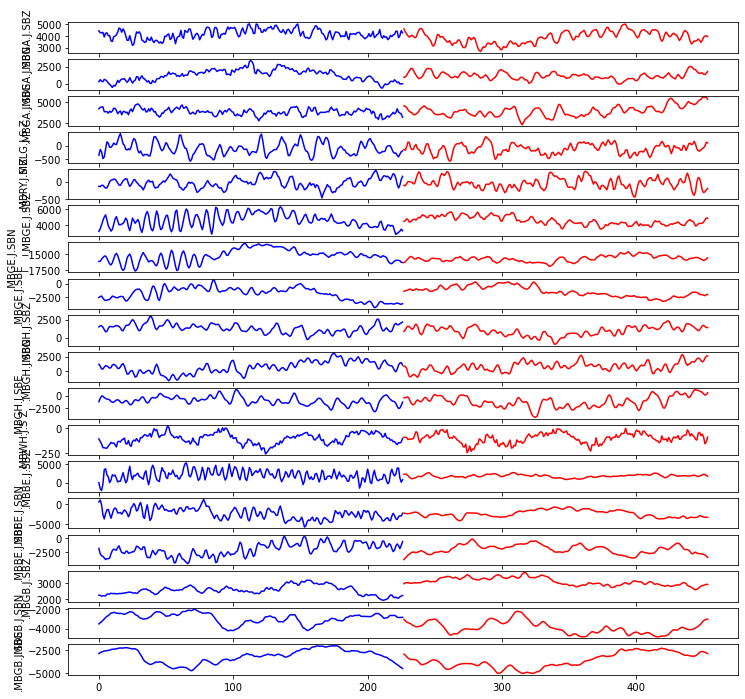

In [97]:
Fs=75.0
fix_sample_rate(cont_st1, Fs=Fs)
fix_sample_rate(cont_st2, Fs=Fs)
examine_rbuffer_joints(cont_st1, cont_st2)

## 5. December 1996 - early on


.MBGA.J.SBZ | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:52.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBZ | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:52.994382Z | 75.2 Hz, 90000 samples
[2663 2545 2602 2557 1933 1401 1493 1223  913  630]
[ 217  143  206  779 1604 1793 1943 2204 2247 2428]
.MBGA.J.SBN | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:52.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBN | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:52.994382Z | 75.2 Hz, 90000 samples
[ 341  633  713  533   72    4  362  403  733 1524]
[2337 3170 3912 4539 4720 4514 4357 4265 4114 3679]
.MBGA.J.SBE | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:52.994382Z | 75.2 Hz, 90000 samples
.MBGA.J.SBE | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:52.994382Z | 75.2 Hz, 90000 samples
[4845 5098 4981 4991 4863 4740 4520 4297 4280 4235]
[4875 5135 4785 4911 4882 5048 5487 5667 5668 5766]
.MBLG.J.S Z | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:52.994382Z | 75.2 Hz, 90000 samples
.MBLG.J.S

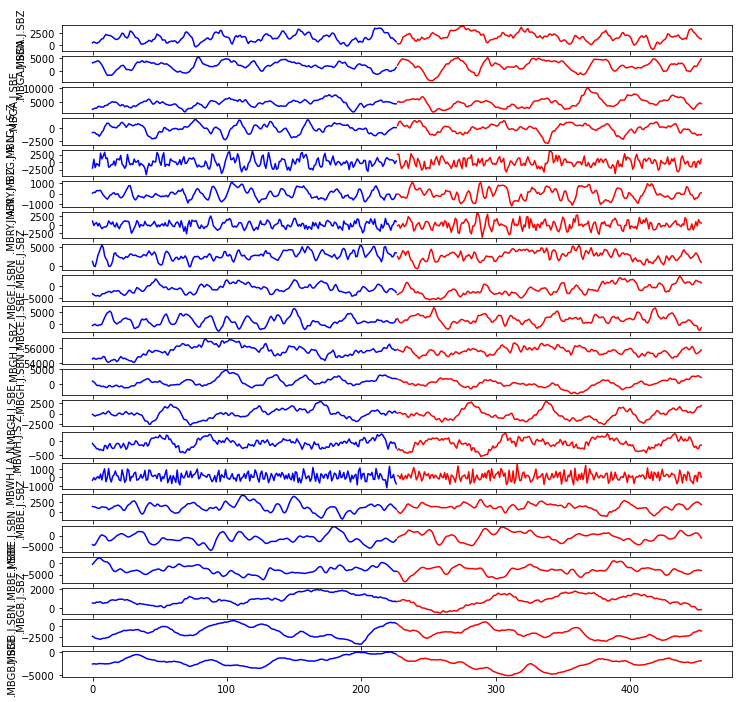

In [98]:
contWAV1 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1996/12/1996-12-30-1710-56S.MVO___021')
contWAV2 = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1996/12/1996-12-30-1730-56S.MVO___021')
cont_st1 = read(contWAV1)
cont_st2 = read(contWAV2)
examine_rbuffer_joints(cont_st1, cont_st2)

.MBGA.J.SBZ | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:56.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBZ | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:56.026667Z | 75.0 Hz, 90000 samples
[2663 2545 2602 2557 1933 1401 1493 1223  913  630]
[ 217  143  206  779 1604 1793 1943 2204 2247 2428]
.MBGA.J.SBN | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:56.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBN | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:56.026667Z | 75.0 Hz, 90000 samples
[ 341  633  713  533   72    4  362  403  733 1524]
[2337 3170 3912 4539 4720 4514 4357 4265 4114 3679]
.MBGA.J.SBE | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:56.026667Z | 75.0 Hz, 90000 samples
.MBGA.J.SBE | 1996-12-30T17:30:56.040000Z - 1996-12-30T17:50:56.026667Z | 75.0 Hz, 90000 samples
[4845 5098 4981 4991 4863 4740 4520 4297 4280 4235]
[4875 5135 4785 4911 4882 5048 5487 5667 5668 5766]
.MBLG.J.S Z | 1996-12-30T17:10:56.040000Z - 1996-12-30T17:30:56.026667Z | 75.0 Hz, 90000 samples
.MBLG.J.S

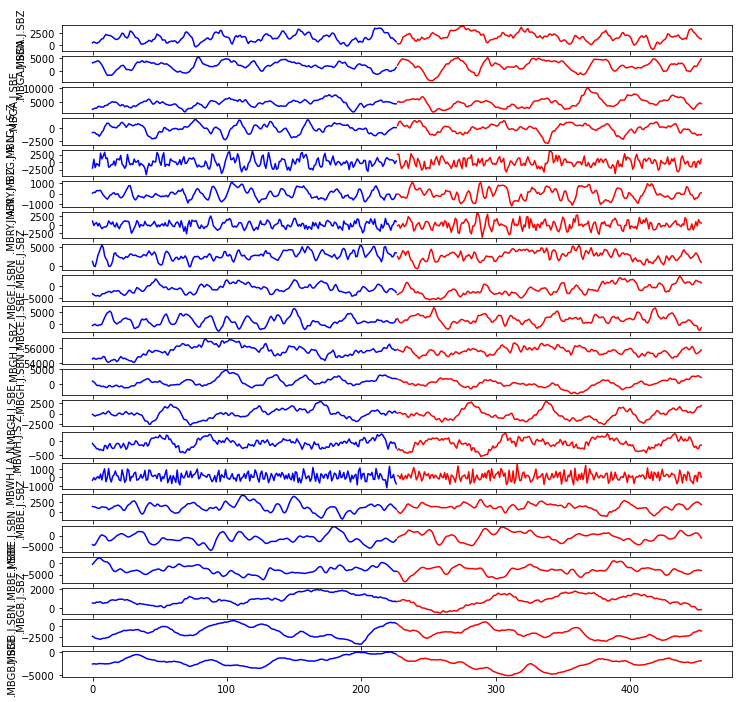

In [99]:
Fs=75.0
fix_sample_rate(cont_st1, Fs=Fs)
fix_sample_rate(cont_st2, Fs=Fs)
examine_rbuffer_joints(cont_st1, cont_st2)

# OK. So we know we should always fix the sampling rate from 75.19 to 75 Hz. But can we make the events line up with the continuous?

In [133]:
def trim_continuousStream_to_eventStream(cont_st, event_st):
    stime = event_st[0].stats.starttime
    etime = event_st[0].stats.endtime
    trim_st = cont_st.copy().trim(starttime=stime, endtime=etime)
    return trim_st

def xcorr_Streams(st1, st2, Fs=75.0):
    all_shifts = []
    for tr1 in st1:
        for tr2 in st2:
            if tr1.id == tr2.id: 
                cc = correlate(tr1, tr2, int(Fs*60*20))
                shift, value = xcorr_max(cc)
                #print(tr1.id, tr2.id, shift,value)
                tr1.stats.shift = shift
                tr1.stats.value = value
                all_shifts.append(shift)
    print(all_shifts)
    return -int(np.median(all_shifts))

def segment_stream(cont_st, time_delay, duration):
    startt = cont_st[0].stats.starttime + time_delay
    endt = startt + duration
    segment_st = cont_st.copy().trim(starttime=startt, endtime=endt)
    return segment_st


def same_chans(event_st0, cont_st0):
    event_st = Stream()
    cont_st = Stream()
    for trE in event_st0:
        for trC in cont_st0:
            if trE.id == trC.id:
                event_st.append(trE)
                cont_st.append(trC)
    return (event_st, cont_st)

def compare_event_and_rbuffer(eventWAV, contWAV, trace_num=0, Fs=75.0):
    event_st0 = read(eventWAV)
    cont_st0 = read(contWAV)
    event_st, cont_st = same_chans(event_st0, cont_st0)
    
    
    fix_sample_rate(event_st, Fs=Fs)
    fix_sample_rate(cont_st, Fs=Fs)

    event_st[trace_num].plot(equal_scale=False);
    cont_st[trace_num].plot(equal_scale=False);

    # naive trimming
    trim_st1 = trim_continuousStream_to_eventStream(cont_st, event_st)
    trim_st1[trace_num].plot(equal_scale=False);
    best_shift1  = xcorr_Streams(trim_st1, event_st, Fs=Fs)
    print('best shift between trim_st1 and event_st is %d samples, or %s seconds' % (best_shift1, best_shift1/Fs))

    # correlation-based trimming - does not seem to work
    best_shift2  = xcorr_Streams(cont_st, event_st, Fs=Fs)
    duration = len(event_st[trace_num].data)/Fs
    print('best shift between cont_st and event_st is %d samples, or %s seconds' % (best_shift2, best_shift2/Fs))
    time_diff = event_st[0].stats.starttime - cont_st[0].stats.starttime
    print('was expecting %s seconds' % time_diff)

    try:
        seg_st1 = segment_stream(cont_st, best_shift/Fs, duration)
        seg_st1[trace_num].plot(equal_scale=False);
    except:
        print('Failed to segment based on x-corr of rbuffer vs event')

    seg_st2 = segment_stream(cont_st, time_diff, duration)
    seg_st2[trace_num].plot(equal_scale=False);
    
    print(event_st[trace_num].data[0:10])
    print(trim_st1[trace_num].data[0:10])
    try:
        print(seg_st1[trace_num].data[0:10])
    except:
        print([])
    print(seg_st2[trace_num].data[0:10])

    print(seg_st2[trace_num].data[-best_shift1:-best_shift1+10])

## Jan 2000

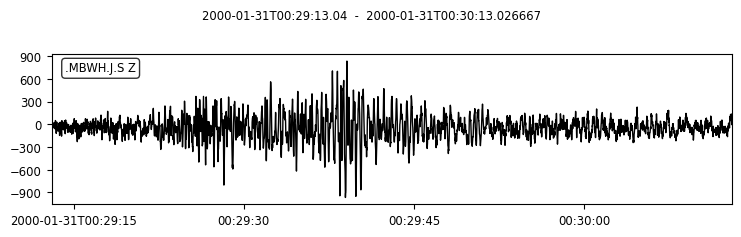

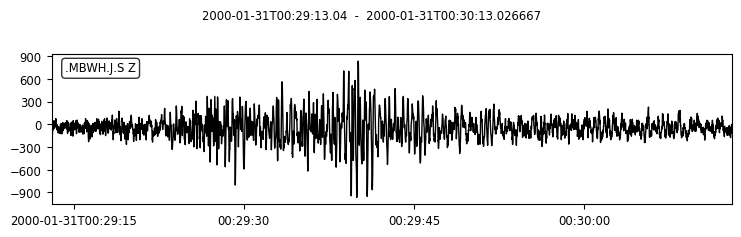

best shift between trim_st1 and event_st is -75 samples, or -1.0 seconds
best shift between cont_st and event_st is 14025 samples, or 187.0 seconds
was expecting 382.0 seconds


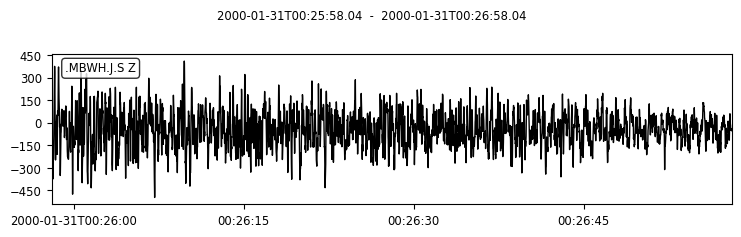

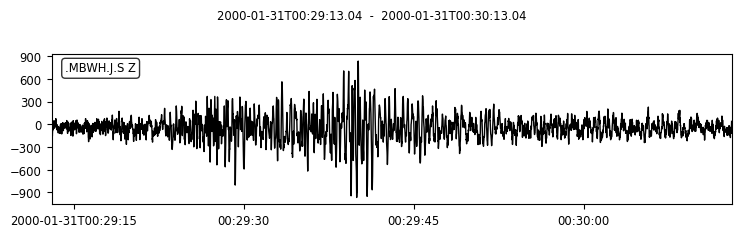

[585 639 528 414 308 261 159  -9 -82   0]
[ 212  199  503  728  800  850 1130 1514 1691 1495]
[ -169  -244  -446  -970 -1508 -1704 -1526 -1259  -989  -833]
[ 212  199  503  728  800  850 1130 1514 1691 1495]
[585 639 528 414 308 261 159  -9 -82   0]


In [107]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2000/01/2000-01-31-0029-13S.MVO___019')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/01/2000-01-31-0022-51S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV)

So in the test above, trim_st1 and seg_st2 appear identical.
And for some reason, the event appears to have data that are 1-second later in the rbuffer than expected, either because the rbuffer start time is off by 1-second, or the event start time is.

No idea why the x-corr fails completely

## January 2004

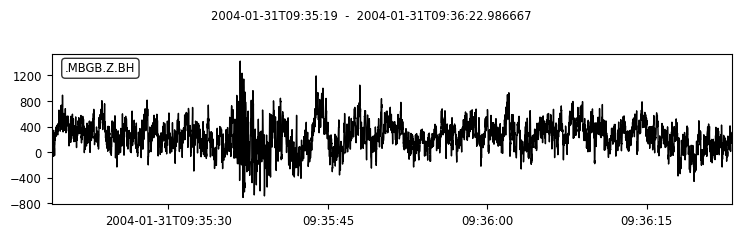

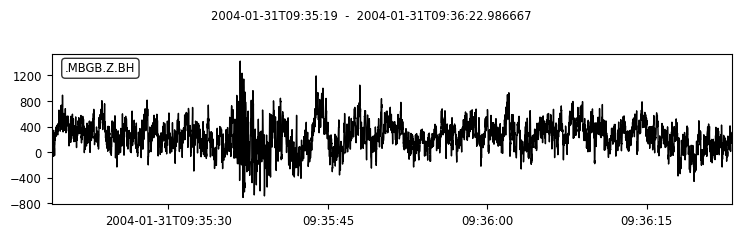

best shift between trim_st1 and event_st is 0 samples, or -0.0 seconds
best shift between cont_st and event_st is -26325 samples, or -351.0 seconds
was expecting 919.0 seconds


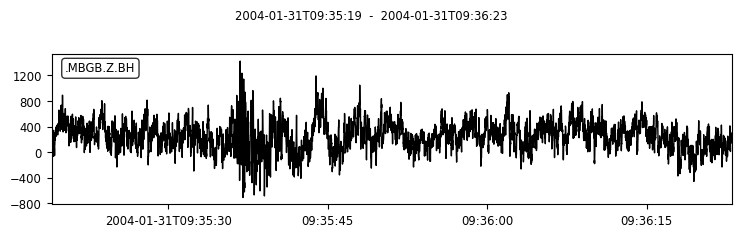

[460 365 244 201 137  83 233 233  76 129]
[460 365 244 201 137  83 233 233  76 129]
[460 365 244 201 137  83 233 233  76 129]
[738 705 890 690 616 516 316 419 372 372]


In [119]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2004/01/2004-01-31-0935-19S.MVO___014')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2004/01/2004-01-31-0920-00S.MVO___011')
compare_event_and_rbuffer(eventWAV, contWAV)

Here the best shift appears to be 0 seconds, but should check with a better waveform as event is truncated

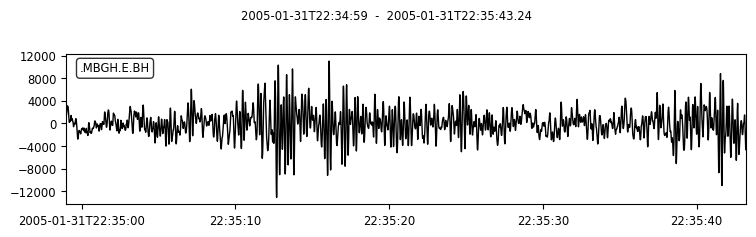

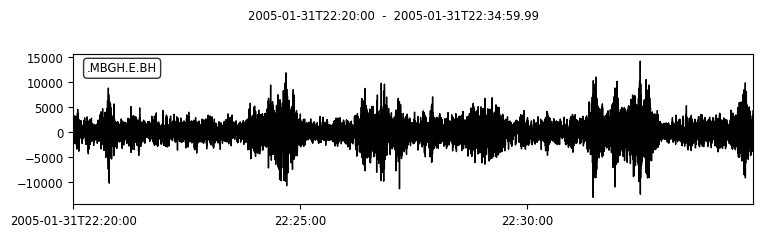

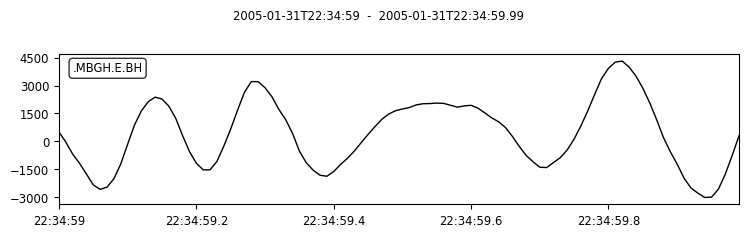

[0, -1794.5, 774.5, 0, 0, -756.5, -119999.5, 726.5, -119999.5, -119999.5, 876.5, 683.5, 969.5, 1273.5, 0, 0, 0, 0, 0, 0]
best shift between trim_st1 and event_st is 0 samples, or -0.0 seconds
[32850, 24637.5, 24637.5, 32850, 32850, 24637.5, -119999.5, 24637.5, -119999.5, -119999.5, 24637.5, 24637.5, 24637.5, 24637.5, 32850, 32850, 32850, 32850, 32850, 32850]
best shift between cont_st and event_st is -24637 samples, or -246.375 seconds
was expecting 899.0 seconds
Failed to segment based on x-corr of rbuffer vs event


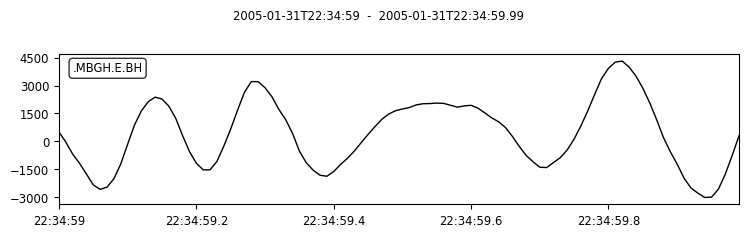

[1356 1570 1867 2149 2417 2624 2888 3108 3112 2956]
[  494   -46  -700 -1198 -1770 -2360 -2600 -2475 -2022 -1226]
[]
[  494   -46  -700 -1198 -1770 -2360 -2600 -2475 -2022 -1226]
[ 117  833 1646 2529 3379 3927 4261 4316 3993 3511]


In [129]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2005/01/2005-01-31-2234-59S.MVO___020')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2005/01/2005-01-31-2220-00S.MVO___020')
compare_event_and_rbuffer(eventWAV, contWAV, trace_num=10, Fs=100.0)

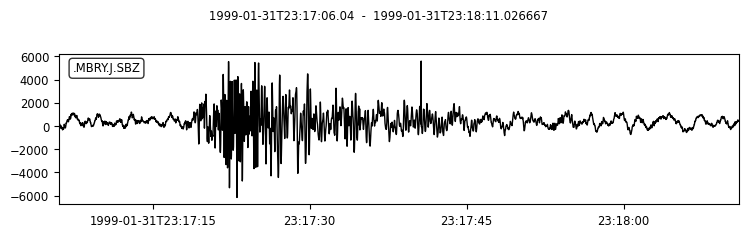

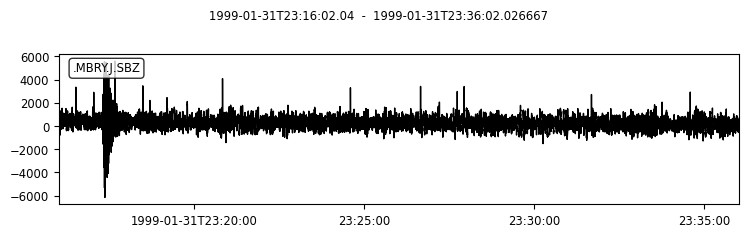

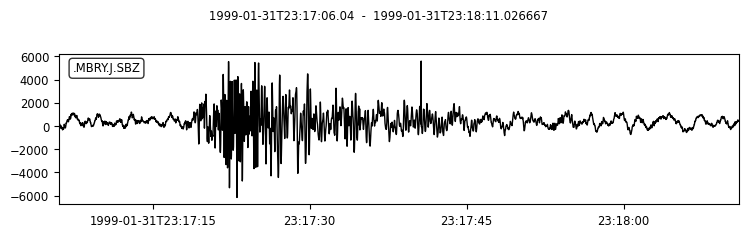

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
best shift between trim_st1 and event_st is 0 samples, or 0.0 seconds
[-37762.5, 23563.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, -37762.5, 43535.5]
best shift between cont_st and event_st is 37762 samples, or 503.49333333333334 seconds
was expecting 64.0 seconds


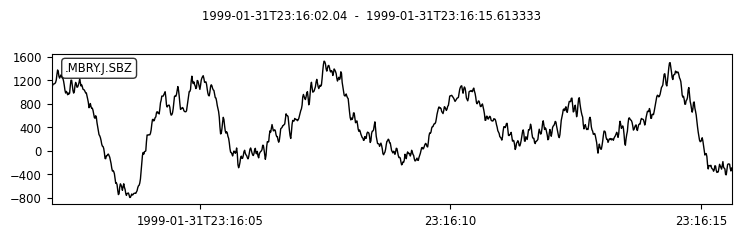

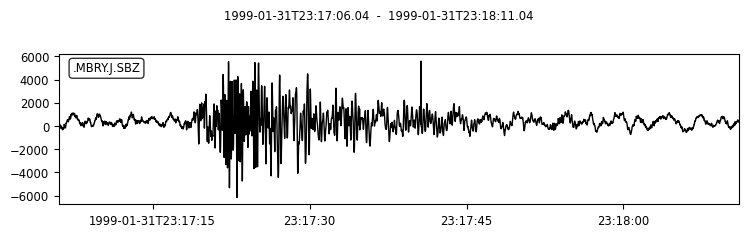

[  1 -32  74 203 177 134 132 113  85  15]
[  1 -32  74 203 177 134 132 113  85  15]
[1083 1092 1127 1135 1137 1145 1161 1203 1297 1374]
[  1 -32  74 203 177 134 132 113  85  15]
[  1 -32  74 203 177 134 132 113  85  15]


In [134]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '1999/01/1999-01-31-2317-06S.MVO___14')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1999/01/1999-01-31-2316-02S.MVO___014')
compare_event_and_rbuffer(eventWAV, contWAV)

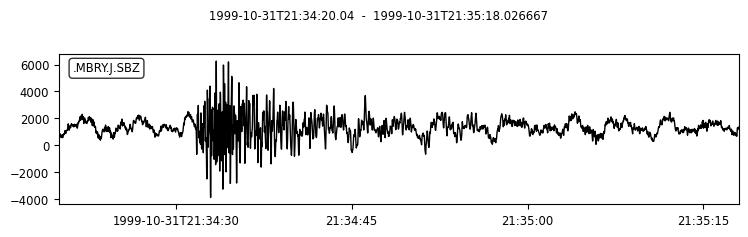

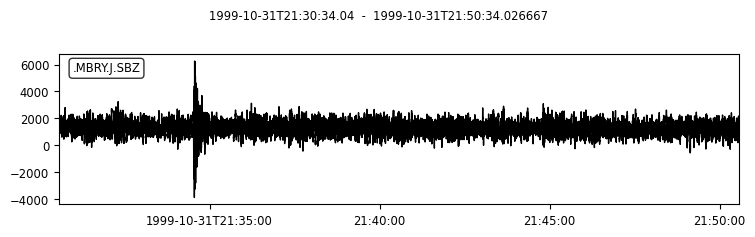

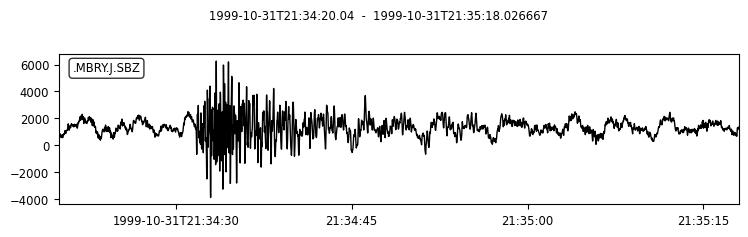

[0, 0, 0, -90000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
best shift between trim_st1 and event_st is 0 samples, or 0.0 seconds
[-25875, -25875, -30339, -90000, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, -25875, 27171]
best shift between cont_st and event_st is 25875 samples, or 345.0 seconds
was expecting 226.0 seconds


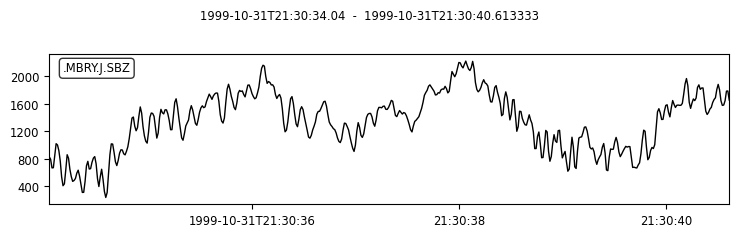

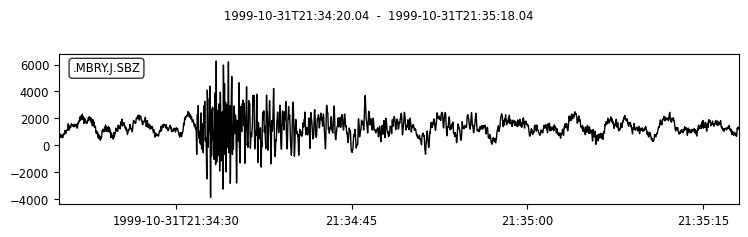

[794 715 651 650 734 839 862 816 763 718]
[794 715 651 650 734 839 862 816 763 718]
[ 829  794  667  670  852 1020 1001  917  767  536]
[794 715 651 650 734 839 862 816 763 718]
[794 715 651 650 734 839 862 816 763 718]


In [135]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '1999/10/9910-31-2134-20S.MVO_19_1')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '1999/10/1999-10-31-2130-34S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV)

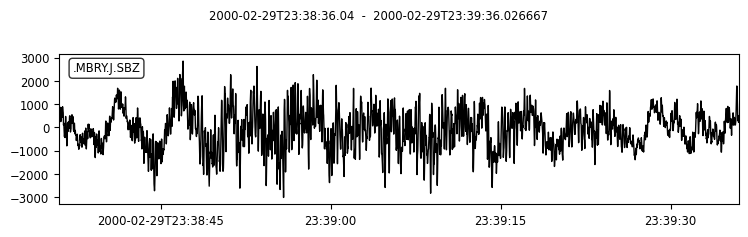

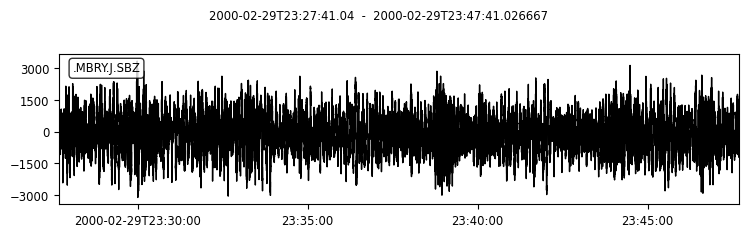

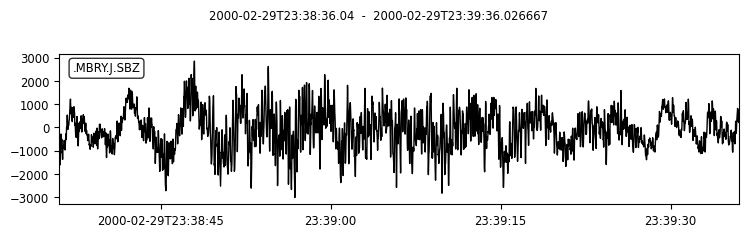

[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]
best shift between trim_st1 and event_st is -75 samples, or -1.0 seconds
[6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, 6450, -45415]
best shift between cont_st and event_st is -6450 samples, or -86.0 seconds
was expecting 655.0 seconds


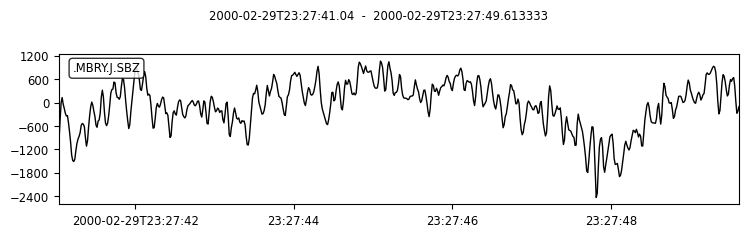

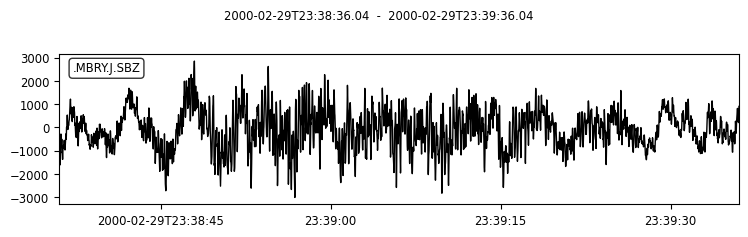

[1132 1218 1063  799  611  579  690  818  864  782]
[ -830  -700  -959 -1422 -1529 -1453 -1419 -1493 -1613 -1446]
[-1013  -486   -15   128   -44  -150  -274  -345  -335  -519]
[ -830  -700  -959 -1422 -1529 -1453 -1419 -1493 -1613 -1446]
[1132 1218 1063  799  611  579  690  818  864  782]


In [143]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2000/02/2000-02-29-2338-36S.MVO___019')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/02/2000-02-29-2327-41S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV, trace_num=0)

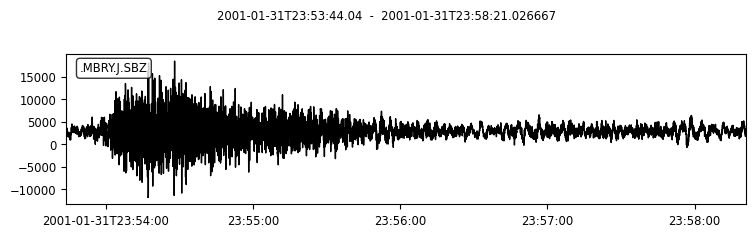

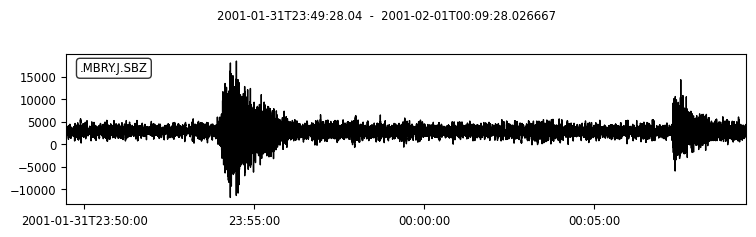

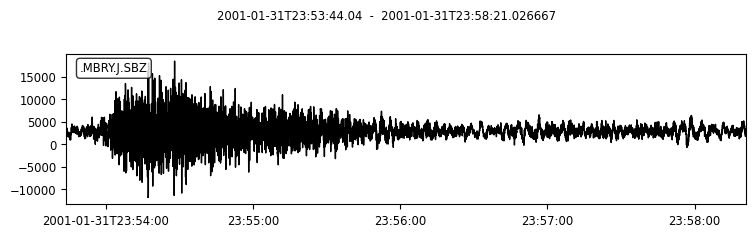

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
best shift between trim_st1 and event_st is 0 samples, or 0.0 seconds
[-15412.5, -15412.5, -15412.5, -15412.5, 29585.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -15412.5, -43492.5]
best shift between cont_st and event_st is 15412 samples, or 205.49333333333334 seconds
was expecting 256.0 seconds


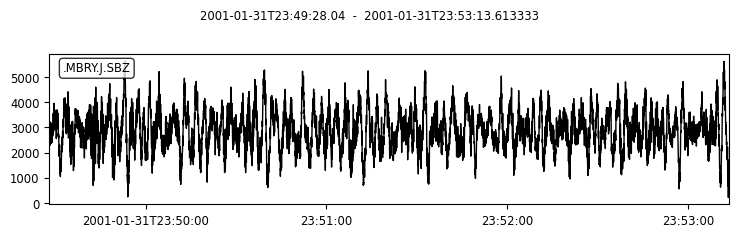

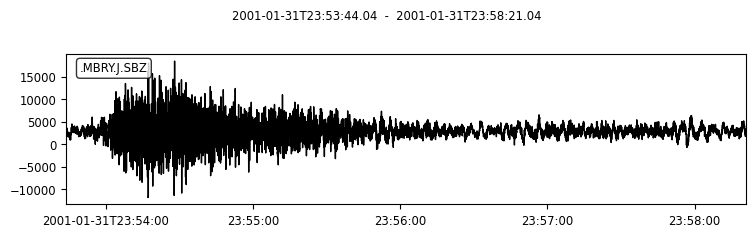

[3239 3167 3247 3413 3400 3193 3133 3247 3205 2995]
[3239 3167 3247 3413 3400 3193 3133 3247 3205 2995]
[2485 2656 2627 2528 2515 2667 2955 3083 3059 3006]
[3239 3167 3247 3413 3400 3193 3133 3247 3205 2995]
[3239 3167 3247 3413 3400 3193 3133 3247 3205 2995]


In [144]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2001/01/2001-01-31-2353-44S.MVO___019')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2001/01/2001-01-31-2349-28S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV, trace_num=0)

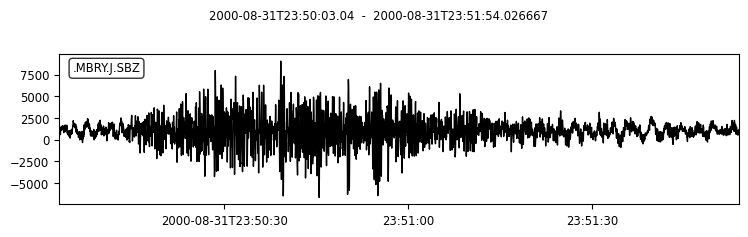

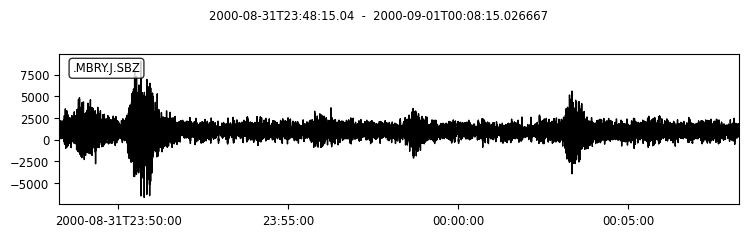

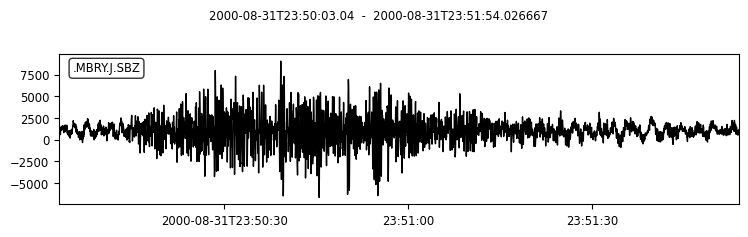

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
best shift between trim_st1 and event_st is 0 samples, or 0.0 seconds
[-32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -32737.5, -16604.5]
best shift between cont_st and event_st is 32737 samples, or 436.49333333333334 seconds
was expecting 108.0 seconds


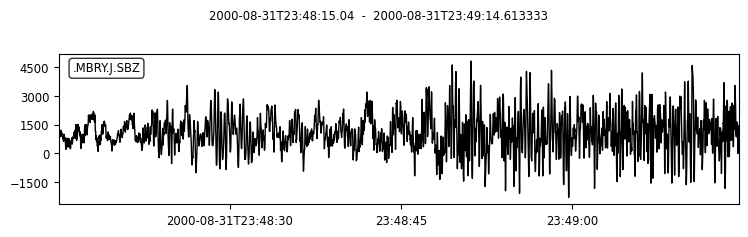

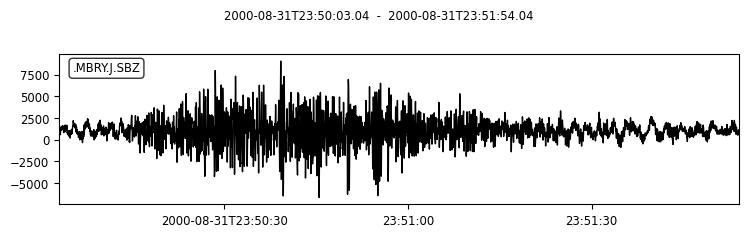

[1133 1015 1015  940  986 1133 1310 1379 1222 1046]
[1133 1015 1015  940  986 1133 1310 1379 1222 1046]
[1366 1380 1336 1236 1079  949  842  863  952 1056]
[1133 1015 1015  940  986 1133 1310 1379 1222 1046]
[1133 1015 1015  940  986 1133 1310 1379 1222 1046]


In [145]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2000/08/2000-08-31-2350-03S.MVO___019')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/08/2000-08-31-2348-15S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV, trace_num=0)

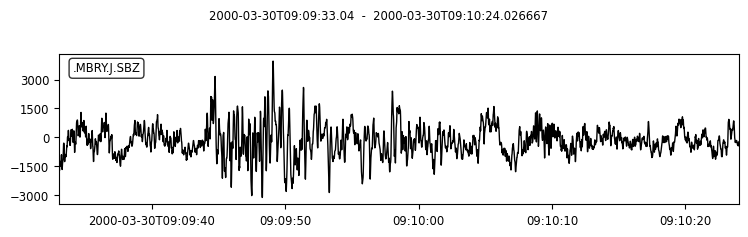

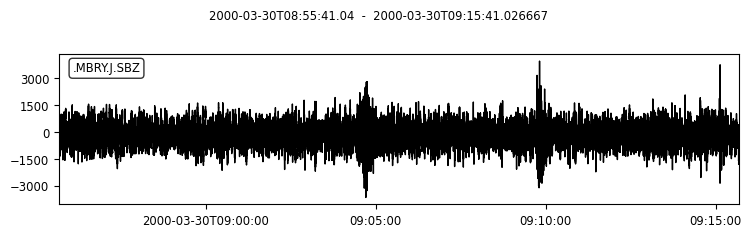

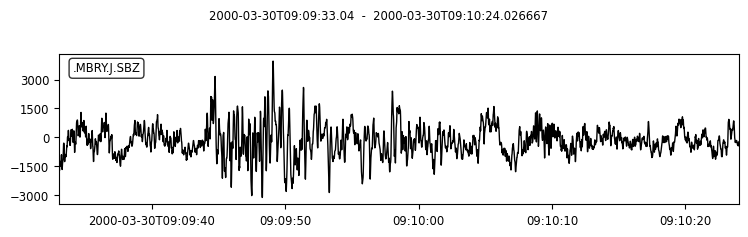

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -90000, -90000]
best shift between trim_st1 and event_st is 0 samples, or 0.0 seconds
[19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, 19312.5, -89999.5, -89999.5]
best shift between cont_st and event_st is -19312 samples, or -257.49333333333334 seconds
was expecting 832.0 seconds
Failed to segment based on x-corr of rbuffer vs event


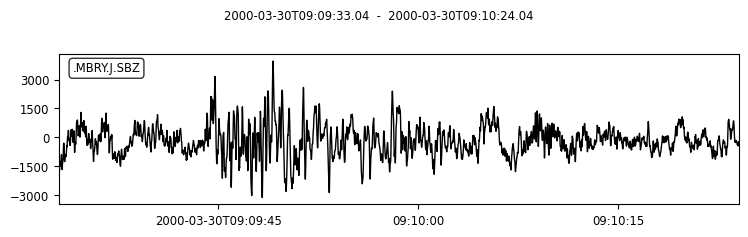

[ -994 -1338 -1656 -1723 -1499 -1258 -1268 -1444 -1490 -1380]
[ -994 -1338 -1656 -1723 -1499 -1258 -1268 -1444 -1490 -1380]
[]
[ -994 -1338 -1656 -1723 -1499 -1258 -1268 -1444 -1490 -1380]
[ -994 -1338 -1656 -1723 -1499 -1258 -1268 -1444 -1490 -1380]


In [146]:
eventWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_DB, '2000/03/2000-03-30-0909-33S.MVO___019')
contWAV = os.path.join(SEISAN_DATA, 'WAV', SEISAN_CONT_DB, '2000/03/2000-03-30-0855-41S.MVO___019')
compare_event_and_rbuffer(eventWAV, contWAV, trace_num=0)

# Conclusion
- Using a sampling rate of 75.0, there is usually either 0.00s or 1.00s difference between the rbuffer and event file. Have not discovered a pattern yet
- What is unclear is whether phase arrival times and other time-based measurements have been screwed up by the incorrect sampling rate of 75.19